# Data Cleaning

## Дані без заголовків

In [2]:
data <- read.csv("https://raw.githubusercontent.com/kleban/r-book-published/refs/heads/main/datasets/untitled.csv")
data

  X23 X185 X85.7             Male
1  41  175  68.3                M
2  11 142*  55.4           Female
3  12 <NA>  48.2              Man
4  54  171    NA Looks like a man
5  32  168  78.0                F

In [4]:
data <- read.csv("https://raw.githubusercontent.com/kleban/r-book-published/refs/heads/main/datasets/untitled.csv", 
                  header = F,
                col.names = c("Age", "Height", "Weight", "Gender"))
data

  Age Height Weight           Gender
1  23    185   85.7             Male
2  41    175   68.3                M
3  11   142*   55.4           Female
4  12   <NA>   48.2              Man
5  54    171     NA Looks like a man
6  32    168   78.0                F

In [ ]:
colnames(data) <- c("Age", "Height", "Weight", "Gender")

In [5]:
library(dplyr)

data <- data |> rename(age = Age)
data


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



  age Height Weight           Gender
1  23    185   85.7             Male
2  41    175   68.3                M
3  11   142*   55.4           Female
4  12   <NA>   48.2              Man
5  54    171     NA Looks like a man
6  32    168   78.0                F

## Погано іменовані дані

In [6]:
data <- read.csv("https://raw.githubusercontent.com/kleban/r-book-published/refs/heads/main/datasets/badtitled.csv")
data

   Person.Age Person__Height person.Weight Person.Gender empty
1          23            185            NA          Male    NA
2          41            175          68.3             M    NA
3          11           142*          55.4        Female    NA
4          12           <NA>          48.2           Man    NA
5          54            191            NA        female    NA
6          32            168          78.0         F        NA
7          22           <NA>          54.0         male.    NA
8          21            165            NA             m    NA
9          14           <NA>          90.2           Man    NA
10         51            250            NA        female    NA
11         41             20          81.0         F        NA
12         66           <NA>          59.0         male.    NA
13         71            171            NA             m    NA

In [ ]:
#install.packages("janitor")

also installing the dependency ‘snakecase’



trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/snakecase_0.11.1.zip'
trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/janitor_2.2.1.zip'


package ‘snakecase’ successfully unpacked and MD5 sums checked
package ‘janitor’ successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Yura\AppData\Local\Temp\RtmpmcIP2T\downloaded_packages


In [9]:
library(janitor)

cleaned_data <- clean_names(data)
cleaned_data

   person_age person_height person_weight person_gender empty
1          23           185            NA          Male    NA
2          41           175          68.3             M    NA
3          11          142*          55.4        Female    NA
4          12          <NA>          48.2           Man    NA
5          54           191            NA        female    NA
6          32           168          78.0         F        NA
7          22          <NA>          54.0         male.    NA
8          21           165            NA             m    NA
9          14          <NA>          90.2           Man    NA
10         51           250            NA        female    NA
11         41            20          81.0         F        NA
12         66          <NA>          59.0         male.    NA
13         71           171            NA             m    NA

In [10]:
?clean_names

In [12]:
write.csv(cleaned_data, "data/cleaned_data.csv", row.names = F)

## Clean gender data

In [15]:
cleaned_data <- cleaned_data |> rename(gender = person_gender)
cleaned_data

   person_age person_height person_weight gender empty
1          23           185            NA   Male    NA
2          41           175          68.3      M    NA
3          11          142*          55.4 Female    NA
4          12          <NA>          48.2    Man    NA
5          54           191            NA female    NA
6          32           168          78.0  F        NA
7          22          <NA>          54.0  male.    NA
8          21           165            NA      m    NA
9          14          <NA>          90.2    Man    NA
10         51           250            NA female    NA
11         41            20          81.0  F        NA
12         66          <NA>          59.0  male.    NA
13         71           171            NA      m    NA

In [16]:
cleaned_data$gender

 [1] "Male"   "   M"   "Female" "Man"    "female" "F    "  "male."  "m"      "Man"    "female"
[11] "F    "  "male."  "m"     

In [17]:
library(stringr)
str_trim(" OA ")

[1] "OA"

In [18]:
str_trim(" OA ", side = "right")

[1] " OA"

In [ ]:
v <- c(4,23,6,78, 233, 1)
v

[1]  4 23  6 78

In [20]:
str_pad(v, width = 3, side = 'left', pad = 0)

[1] "004" "023" "006" "078"

In [ ]:
toupper("Ostroh Academy")
#tolower()

[1] "OSTROH ACADEMY"

## fuzzy search

In [22]:
adist("Ostroh Academy", "Nu OA")

     [,1]
[1,]   13

In [23]:
adist("Ostroh Academy", "ostroh")

     [,1]
[1,]    9

In [24]:
adist("Ostroh Academy", "nu ostroh academy")

     [,1]
[1,]    5

In [28]:
m <- c("male", "female")
res <- adist(cleaned_data$gender, m)
rownames(res) <- cleaned_data$gender
colnames(res) <- m
res

       male female
Male      1      3
   M      4      6
Female    2      1
Man       3      5
female    2      0
F         5      6
male.     1      3
m         3      5
Man       3      5
female    2      0
F         5      6
male.     1      3
m         3      5

In [29]:
m <- c("male", "female")
res <- adist(tolower(cleaned_data$gender), m)
rownames(res) <- cleaned_data$gender
colnames(res) <- m
res

       male female
Male      0      2
   M      4      6
Female    2      0
Man       2      4
female    2      0
F         5      5
male.     1      3
m         3      5
Man       2      4
female    2      0
F         5      5
male.     1      3
m         3      5

In [32]:
m <- c("male", "female")
res <- adist(str_trim(tolower(cleaned_data$gender)), m)
rownames(res) <- cleaned_data$gender
colnames(res) <- m
as.data.frame(res) |> distinct()

       male female
Male      0      2
X...M     3      5
Female    2      0
Man       2      4
F....     4      5
male.     1      3

In [33]:
cleaned_data <- cleaned_data |>
  mutate(gender = str_trim(tolower(gender))) |>
  mutate(gender = ifelse(gender == "f", "female", gender))
cleaned_data

   person_age person_height person_weight gender empty
1          23           185            NA   male    NA
2          41           175          68.3      m    NA
3          11          142*          55.4 female    NA
4          12          <NA>          48.2    man    NA
5          54           191            NA female    NA
6          32           168          78.0 female    NA
7          22          <NA>          54.0  male.    NA
8          21           165            NA      m    NA
9          14          <NA>          90.2    man    NA
10         51           250            NA female    NA
11         41            20          81.0 female    NA
12         66          <NA>          59.0  male.    NA
13         71           171            NA      m    NA

In [35]:
m <- c("male", "female")
res <- adist(str_trim(tolower(cleaned_data$gender)), m)
rownames(res) <- cleaned_data$gender
colnames(res) <- m
as.data.frame(res) |> distinct()

       male female
male      0      2
m         3      5
female    2      0
man       2      4
male.     1      3

In [36]:
nums <- apply(res, 1, which.min)
nums

  male      m female    man female female  male.      m    man female female  male.      m 
     1      1      2      1      2      2      1      1      1      2      2      1      1 

In [38]:
data.frame(initial = cleaned_data$gender, coded = m[nums])

   initial  coded
1     male   male
2        m   male
3   female female
4      man   male
5   female female
6   female female
7    male.   male
8        m   male
9      man   male
10  female female
11  female female
12   male.   male
13       m   male

In [39]:
cleaned_data <- cleaned_data |>
  mutate(gender = m[nums])
cleaned_data

   person_age person_height person_weight gender empty
1          23           185            NA   male    NA
2          41           175          68.3   male    NA
3          11          142*          55.4 female    NA
4          12          <NA>          48.2   male    NA
5          54           191            NA female    NA
6          32           168          78.0 female    NA
7          22          <NA>          54.0   male    NA
8          21           165            NA   male    NA
9          14          <NA>          90.2   male    NA
10         51           250            NA female    NA
11         41            20          81.0 female    NA
12         66          <NA>          59.0   male    NA
13         71           171            NA   male    NA

## Height

In [41]:
data1 <- cleaned_data |>
  rename(height = person_height) |>
  mutate(height = as.numeric(str_remove(height, pattern = "[*]")))
data1

   person_age height person_weight gender empty
1          23    185            NA   male    NA
2          41    175          68.3   male    NA
3          11    142          55.4 female    NA
4          12     NA          48.2   male    NA
5          54    191            NA female    NA
6          32    168          78.0 female    NA
7          22     NA          54.0   male    NA
8          21    165            NA   male    NA
9          14     NA          90.2   male    NA
10         51    250            NA female    NA
11         41     20          81.0 female    NA
12         66     NA          59.0   male    NA
13         71    171            NA   male    NA

In [43]:
install.packages("mice")

also installing the dependencies ‘ucminf’, ‘iterators’, ‘ordinal’, ‘foreach’, ‘shape’, ‘pan’, ‘jomo’, ‘glmnet’, ‘mitml’



trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/ucminf_1.2.2.zip'
trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/iterators_1.0.14.zip'
trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/ordinal_2023.12-4.1.zip'
trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/foreach_1.5.2.zip'
trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/shape_1.4.6.1.zip'
trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/pan_1.9.zip'
trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/jomo_2.7-6.zip'
trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/glmnet_4.1-10.zip'
trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/mitml_0.4-5.zip'
trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/mice_3.18.0.zip'


package ‘ucminf’ successfully unpacked and MD5 sums checked
package ‘iterators’ successfully unpacked and MD5 sums checked
package ‘ordinal’ successfully unpacked and MD5 sums checked
package ‘foreach’ successfully unpacked and MD5 sums checked
package ‘shape’ successfully unpacked and MD5 sums checked
package ‘pan’ successfully unpacked and MD5 sums checked
package ‘jomo’ successfully unpacked and MD5 sums checked
package ‘glmnet’ successfully unpacked and MD5 sums checked
package ‘mitml’ successfully unpacked and MD5 sums checked
package ‘mice’ successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Yura\AppData\Local\Temp\RtmpmcIP2T\downloaded_packages


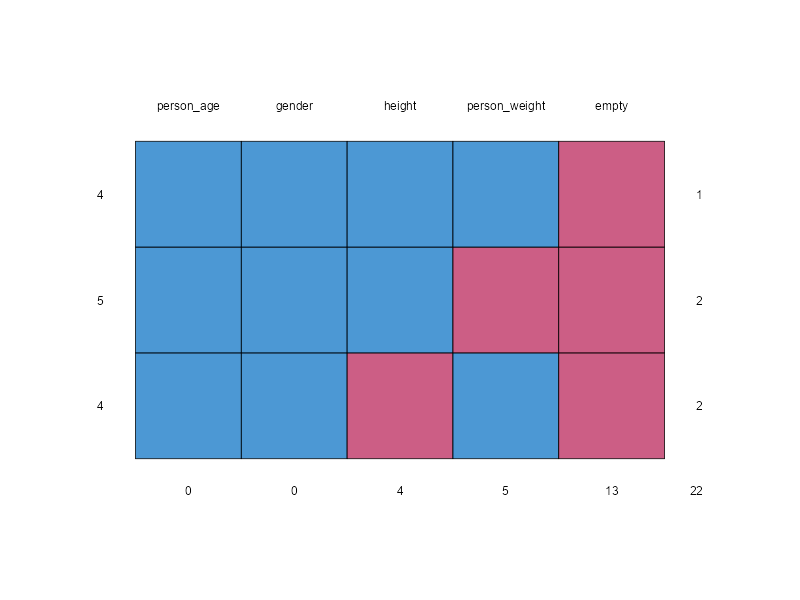

  person_age gender height person_weight empty   
4          1      1      1             1     0  1
5          1      1      1             0     0  2
4          1      1      0             1     0  2
           0      0      4             5    13 22

In [46]:
library(mice)
md.pattern(data1)

In [47]:
install.packages("VIM")

also installing the dependencies ‘DEoptimR’, ‘lmtest’, ‘proxy’, ‘colorspace’, ‘robustbase’, ‘sp’, ‘vcd’, ‘e1071’, ‘laeken’, ‘ranger’, ‘xgboost’



trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/DEoptimR_1.1-4.zip'
trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/lmtest_0.9-40.zip'
trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/proxy_0.4-27.zip'
trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/colorspace_2.1-2.zip'
trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/robustbase_0.99-6.zip'
trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/sp_2.2-0.zip'
trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/vcd_1.4-13.zip'
trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/e1071_1.7-16.zip'
trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/laeken_0.5.3.zip'
trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/ranger_0.17.0.zip'
trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/xgboost_1.7.11.1.zip'
trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/VIM_6.2.6.zip'


package ‘DEoptimR’ successfully unpacked and MD5 sums checked
package ‘lmtest’ successfully unpacked and MD5 sums checked
package ‘proxy’ successfully unpacked and MD5 sums checked
package ‘colorspace’ successfully unpacked and MD5 sums checked
package ‘robustbase’ successfully unpacked and MD5 sums checked
package ‘sp’ successfully unpacked and MD5 sums checked
package ‘vcd’ successfully unpacked and MD5 sums checked
package ‘e1071’ successfully unpacked and MD5 sums checked
package ‘laeken’ successfully unpacked and MD5 sums checked
package ‘ranger’ successfully unpacked and MD5 sums checked
package ‘xgboost’ successfully unpacked and MD5 sums checked
package ‘VIM’ successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Yura\AppData\Local\Temp\RtmpmcIP2T\downloaded_packages


Loading required package: colorspace
Loading required package: grid
VIM is ready to use.

Suggestions and bug-reports can be submitted at: https://github.com/statistikat/VIM/issues

Attaching package: ‘VIM’

The following object is masked from ‘package:datasets’:

    sleep



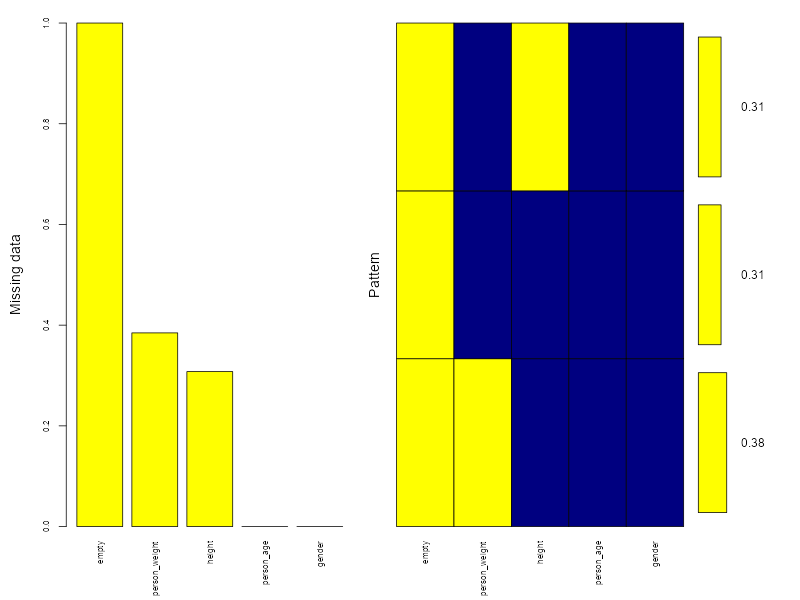


 Variables sorted by number of missings: 
      Variable     Count
         empty 1.0000000
 person_weight 0.3846154
        height 0.3076923
    person_age 0.0000000
        gender 0.0000000



 Missings in variables:
      Variable Count
        height     4
 person_weight     5
         empty    13

In [48]:
library(VIM)
mice_plot <- aggr(data1, 
                  col=c('navyblue','yellow'),
                  numbers=TRUE, 
                  sortVars=TRUE,
                  labels=names(data1), 
                  cex.axis=.7,
                  gap=3, 
                  ylab=c("Missing data","Pattern"))
mice_plot

In [51]:
install.packages("Amelia")

also installing the dependency ‘RcppArmadillo’



trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/RcppArmadillo_15.0.2-2.zip'
trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/Amelia_1.8.3.zip'


package ‘RcppArmadillo’ successfully unpacked and MD5 sums checked
package ‘Amelia’ successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Yura\AppData\Local\Temp\RtmpmcIP2T\downloaded_packages


Loading required package: Rcpp
## 
## Amelia II: Multiple Imputation
## (Version 1.8.3, built: 2024-11-07)
## Copyright (C) 2005-2025 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 


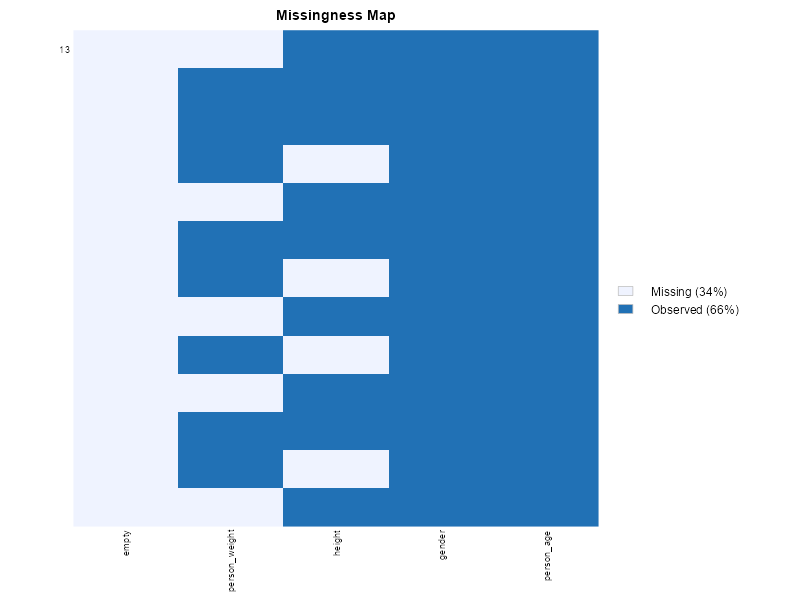

In [52]:
library(Amelia)
Amelia::missmap(data1)

In [53]:
complete.cases(data1)

 [1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

In [54]:
data_cleaned <- remove_empty(data1, which = c("rows","cols"), quiet = FALSE)
data_cleaned

No empty rows to remove.
Removing 1 empty columns of 5 columns total (Removed: empty).


   person_age height person_weight gender
1          23    185            NA   male
2          41    175          68.3   male
3          11    142          55.4 female
4          12     NA          48.2   male
5          54    191            NA female
6          32    168          78.0 female
7          22     NA          54.0   male
8          21    165            NA   male
9          14     NA          90.2   male
10         51    250            NA female
11         41     20          81.0 female
12         66     NA          59.0   male
13         71    171            NA   male

In [55]:
na.omit(data_cleaned)

   person_age height person_weight gender
2          41    175          68.3   male
3          11    142          55.4 female
6          32    168          78.0 female
11         41     20          81.0 female

In [57]:
data_w0 <- data1 |> 
    mutate(person_weight = ifelse(is.na(person_weight), 0, person_weight))
data_w0

   person_age height person_weight gender empty
1          23    185           0.0   male    NA
2          41    175          68.3   male    NA
3          11    142          55.4 female    NA
4          12     NA          48.2   male    NA
5          54    191           0.0 female    NA
6          32    168          78.0 female    NA
7          22     NA          54.0   male    NA
8          21    165           0.0   male    NA
9          14     NA          90.2   male    NA
10         51    250           0.0 female    NA
11         41     20          81.0 female    NA
12         66     NA          59.0   male    NA
13         71    171           0.0   male    NA

In [58]:
data_m <- data1 |> 
    mutate(person_weight = ifelse(is.na(person_weight), mean(data1$person_weight, na.rm = T), person_weight))
data_m

   person_age height person_weight gender empty
1          23    185       66.7625   male    NA
2          41    175       68.3000   male    NA
3          11    142       55.4000 female    NA
4          12     NA       48.2000   male    NA
5          54    191       66.7625 female    NA
6          32    168       78.0000 female    NA
7          22     NA       54.0000   male    NA
8          21    165       66.7625   male    NA
9          14     NA       90.2000   male    NA
10         51    250       66.7625 female    NA
11         41     20       81.0000 female    NA
12         66     NA       59.0000   male    NA
13         71    171       66.7625   male    NA

In [60]:
install.packages("Hmisc")

also installing the dependencies ‘checkmate’, ‘gridExtra’, ‘htmlTable’, ‘viridis’



trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/checkmate_2.3.3.zip'
trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/gridExtra_2.3.zip'
trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/htmlTable_2.4.3.zip'
trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/viridis_0.6.5.zip'
trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/Hmisc_5.2-3.zip'


package ‘checkmate’ successfully unpacked and MD5 sums checked
package ‘gridExtra’ successfully unpacked and MD5 sums checked
package ‘htmlTable’ successfully unpacked and MD5 sums checked
package ‘viridis’ successfully unpacked and MD5 sums checked
package ‘Hmisc’ successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Yura\AppData\Local\Temp\RtmpmcIP2T\downloaded_packages


In [63]:
library(Hmisc)
data_hot <- data1 |> 
    mutate(person_weight = impute(data1$person_weight, "random")) 
data_hot 

   person_age height person_weight gender empty
1          23    185          55.4   male    NA
2          41    175          68.3   male    NA
3          11    142          55.4 female    NA
4          12     NA          48.2   male    NA
5          54    191          55.4 female    NA
6          32    168          78.0 female    NA
7          22     NA          54.0   male    NA
8          21    165          90.2   male    NA
9          14     NA          90.2   male    NA
10         51    250          55.4 female    NA
11         41     20          81.0 female    NA
12         66     NA          59.0   male    NA
13         71    171          81.0   male    NA

In [66]:
library(tidyr)

In [68]:
data1

   person_age height person_weight gender empty
1          23    185            NA   male    NA
2          41    175          68.3   male    NA
3          11    142          55.4 female    NA
4          12     NA          48.2   male    NA
5          54    191            NA female    NA
6          32    168          78.0 female    NA
7          22     NA          54.0   male    NA
8          21    165            NA   male    NA
9          14     NA          90.2   male    NA
10         51    250            NA female    NA
11         41     20          81.0 female    NA
12         66     NA          59.0   male    NA
13         71    171            NA   male    NA

In [67]:
data_sgm <- data1 |> 
  group_by(gender) |>
  mutate(person_weight = replace_na(person_weight, mean(person_weight, na.rm = TRUE)))
data_sgm

# A tibble: 13 × 5
# Groups:   gender [2]
   person_age height person_weight gender empty
        <int>  <dbl>         <dbl> <chr>  <lgl>
 1         23    185          63.9 male   NA   
 2         41    175          68.3 male   NA   
 3         11    142          55.4 female NA   
 4         12     NA          48.2 male   NA   
 5         54    191          71.5 female NA   
 6         32    168          78   female NA   
 7         22     NA          54   male   NA   
 8         21    165          63.9 male   NA   
 9         14     NA          90.2 male   NA   
10         51    250          71.5 female NA   
11         41     20          81   female NA   
12         66     NA          59   male   NA   
13         71    171          63.9 male   NA   

In [71]:
data1

   person_age height person_weight gender empty
1          23    185            NA   male    NA
2          41    175          68.3   male    NA
3          11    142          55.4 female    NA
4          12     NA          48.2   male    NA
5          54    191            NA female    NA
6          32    168          78.0 female    NA
7          22     NA          54.0   male    NA
8          21    165            NA   male    NA
9          14     NA          90.2   male    NA
10         51    250            NA female    NA
11         41     20          81.0 female    NA
12         66     NA          59.0   male    NA
13         71    171            NA   male    NA

In [72]:
library(VIM)
data_knn <- kNN(data_cleaned)
data_knn

   person_age person_weight    person_age person_weight 
         11.0          48.2          71.0          90.2 
person_age     height person_age     height 
        11         20         71        250 


   person_age height person_weight gender person_age_imp height_imp person_weight_imp gender_imp
1          23    185          59.0   male          FALSE      FALSE              TRUE      FALSE
2          41    175          68.3   male          FALSE      FALSE             FALSE      FALSE
3          11    142          55.4 female          FALSE      FALSE             FALSE      FALSE
4          12    168          48.2   male          FALSE       TRUE             FALSE      FALSE
5          54    191          68.3 female          FALSE      FALSE              TRUE      FALSE
6          32    168          78.0 female          FALSE      FALSE             FALSE      FALSE
7          22    168          54.0   male          FALSE       TRUE             FALSE      FALSE
8          21    165          59.0   male          FALSE      FALSE              TRUE      FALSE
9          14    168          90.2   male          FALSE       TRUE             FALSE      FALSE
10         51    250          

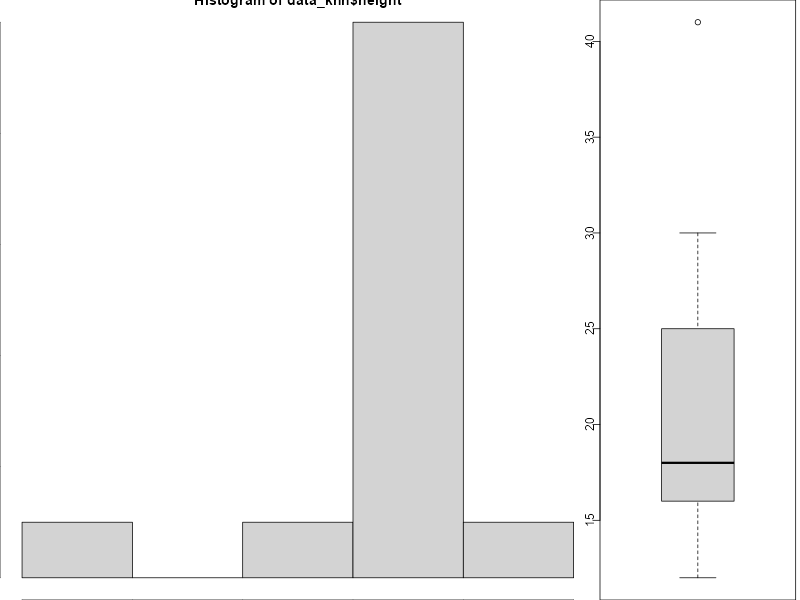

In [75]:
hist(data_knn$height)

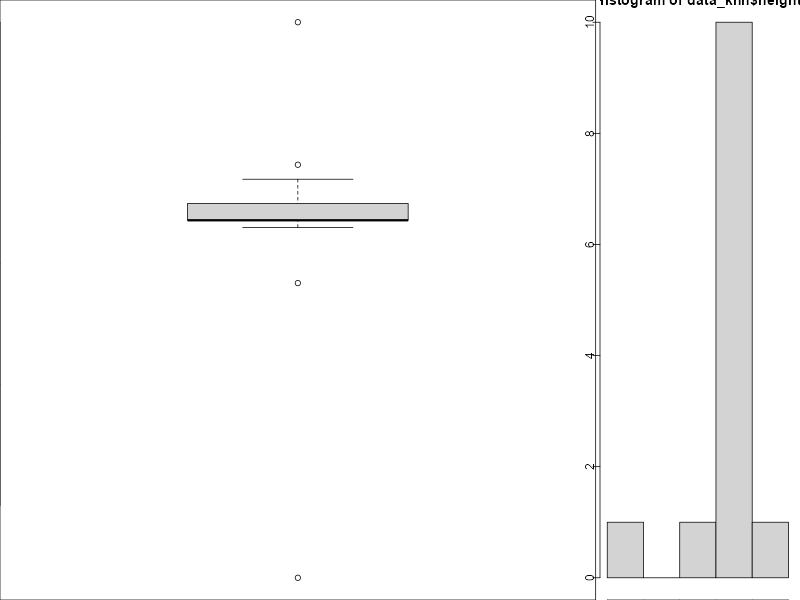

In [73]:
boxplot(data_knn$height)

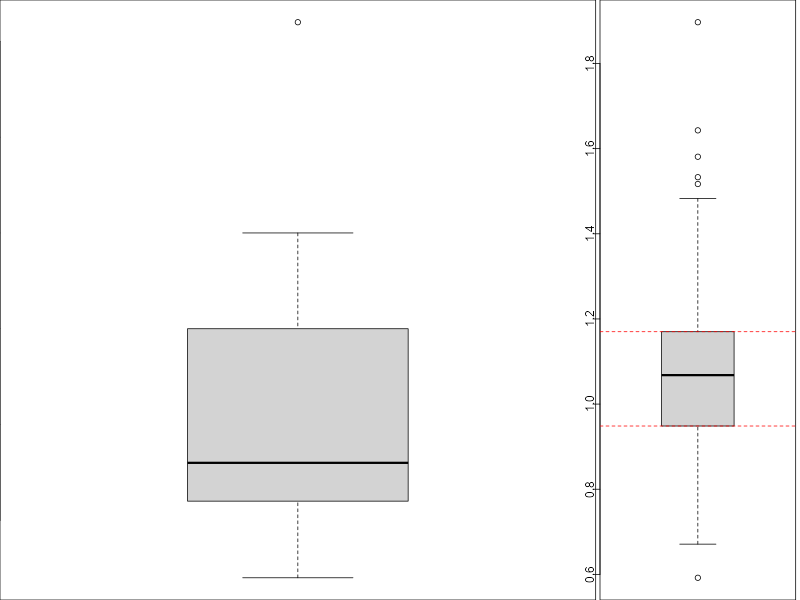

In [77]:
temp <- c(15, 17, 19, 12, 30, 41, 17, 20)
boxplot(temp, ylab = "Celcium")

In [2]:
river_data <- read.csv("https://raw.githubusercontent.com/kleban/r-book-published/refs/heads/main/datasets/river_eco.csv")
river_data

    index nitrate    months
1       1   1.581   January
2       2   1.323  February
3       3   1.140     March
4       4   1.245     April
5       5   1.072       May
6       6   1.483      June
7       7   1.162      July
8       8   1.304    August
9       9   1.140 September
10     10   1.118   October
11     11   1.342  November
12     12   1.245  December
13     13   1.204   January
14     14   1.140  February
15     15   1.204     March
16     16   1.118     April
17     17   1.025       May
18     18   1.118      June
19     19   1.285      July
20     20   1.140    August
21     21   0.949 September
22     22   0.922   October
23     23   0.949  November
24     24   1.118  December
25     25   1.265   January
26     26   1.095  February
27     27   1.183     March
28     28   1.162     April
29     29   1.118       May
30     30   1.285      June
31     31   1.049      July
32     32   0.922    August
33     33   0.775 September
34     34   0.866   October
35     35   0.922  N

In [4]:
library(dplyr)
m_levels <- river_data$months[1:12]
river_data <- river_data |>
    mutate(months = factor(months, levels = m_levels))
head(river_data)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



  index nitrate   months
1     1   1.581  January
2     2   1.323 February
3     3   1.140    March
4     4   1.245    April
5     5   1.072      May
6     6   1.483     June

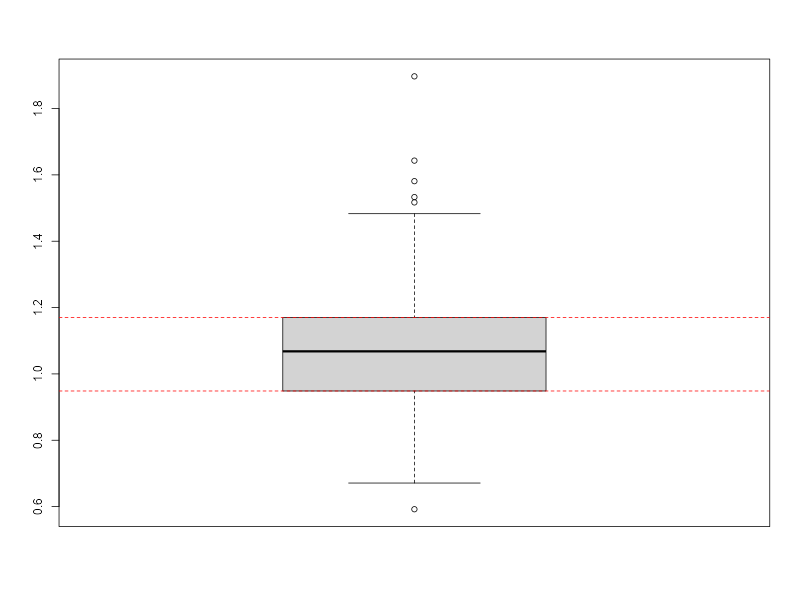

In [7]:
boxplot(river_data$nitrate)
# Додамо лінії 1 та 3 квантилів
abline(h=quantile(river_data$nitrate,0.25),col="red",lty=2)
abline(h=quantile(river_data$nitrate,0.75),col="red",lty=2)

In [8]:
lower_bound <- quantile(river_data$nitrate, 0.025)
lower_bound

   2.5% 
0.75475 

In [9]:
upper_bound <- quantile(river_data$nitrate, 0.975)
upper_bound

 97.5% 
1.4095 

In [10]:
outlier_index <- which(river_data$nitrate < lower_bound | river_data$nitrate > upper_bound)
outlier_index

 [1]   1   6  36  53 104 119 121 156 159 167 199 200 269 270 281 282

In [11]:
river_data[outlier_index, ]

    index nitrate   months
1       1   1.581  January
6       6   1.483     June
36     36   1.643 December
53     53   1.533      May
104   104   0.671   August
119   119   1.517 November
121   121   1.414  January
156   156   1.897 December
159   159   1.414    March
167   167   0.671 November
199   199   0.748     July
200   200   0.592   August
269   269   0.700      May
270   270   0.673     June
281   281   0.730      May
282   282   0.693     June

In [21]:
river_data$nitrate_upd <- river_data$nitrate
qnt <- quantile(river_data$nitrate_upd, probs=c(.07, .93), na.rm = T)
H <- 1.5 * IQR(qnt[1], na.rm = T)
river_data$nitrate_upd[river_data$nitrate_upd < (qnt[1] - H)] <- qnt[1]
river_data$nitrate_upd[river_data$nitrate_upd > (qnt[2] + H)] <- qnt[2]

qnt

    7%    93% 
0.8253 1.3040 

In [22]:
river_data

    index nitrate    months nitrate_upd
1       1   1.581   January      1.3040
2       2   1.323  February      1.3040
3       3   1.140     March      1.1400
4       4   1.245     April      1.2450
5       5   1.072       May      1.0720
6       6   1.483      June      1.3040
7       7   1.162      July      1.1620
8       8   1.304    August      1.3040
9       9   1.140 September      1.1400
10     10   1.118   October      1.1180
11     11   1.342  November      1.3040
12     12   1.245  December      1.2450
13     13   1.204   January      1.2040
14     14   1.140  February      1.1400
15     15   1.204     March      1.2040
16     16   1.118     April      1.1180
17     17   1.025       May      1.0250
18     18   1.118      June      1.1180
19     19   1.285      July      1.2850
20     20   1.140    August      1.1400
21     21   0.949 September      0.9490
22     22   0.922   October      0.9220
23     23   0.949  November      0.9490
24     24   1.118  December      1.1180


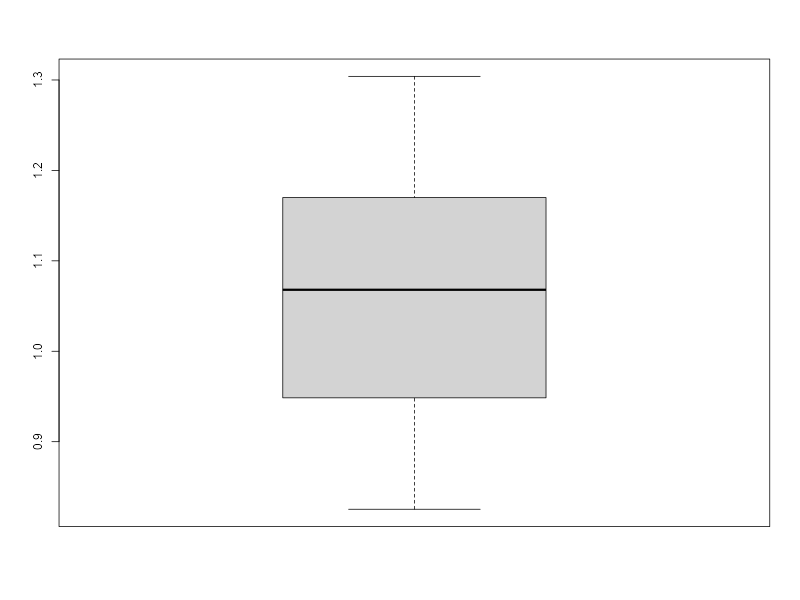

In [23]:
boxplot(river_data$nitrate_upd)

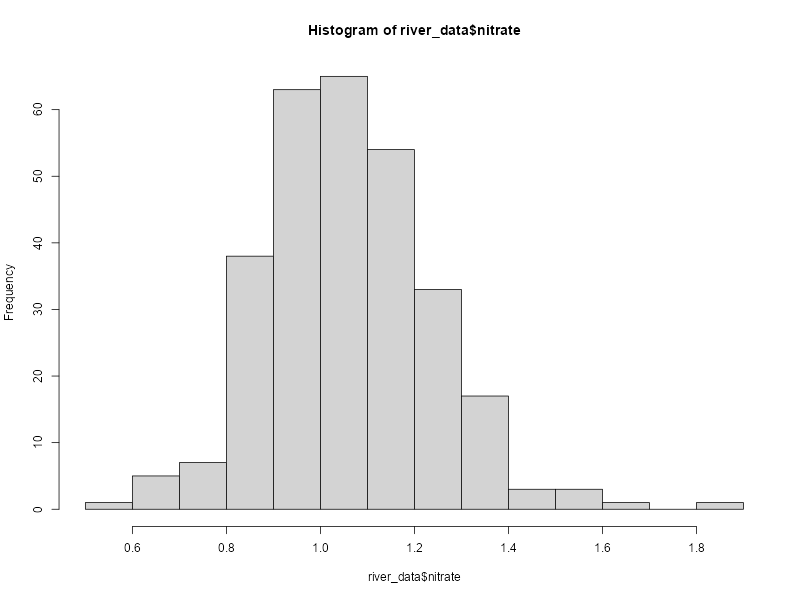

In [24]:
hist(river_data$nitrate)

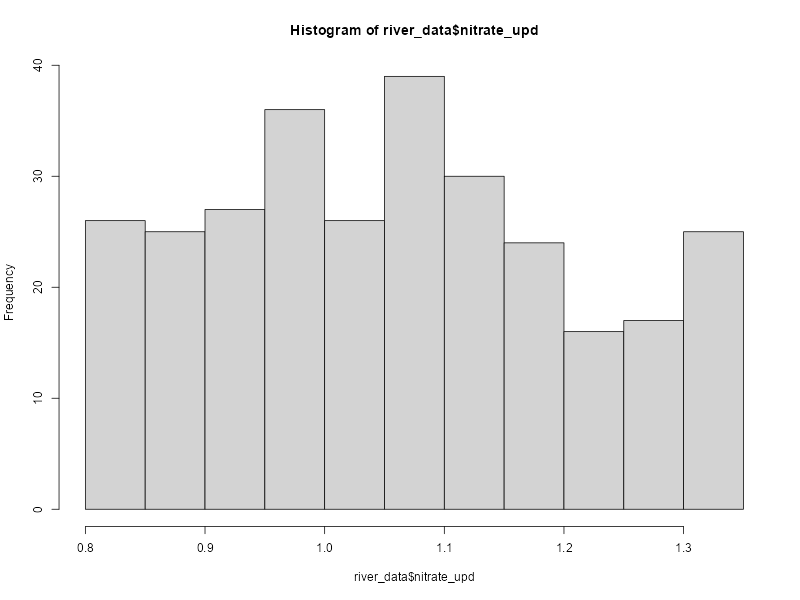

In [25]:
hist(river_data$nitrate_upd)

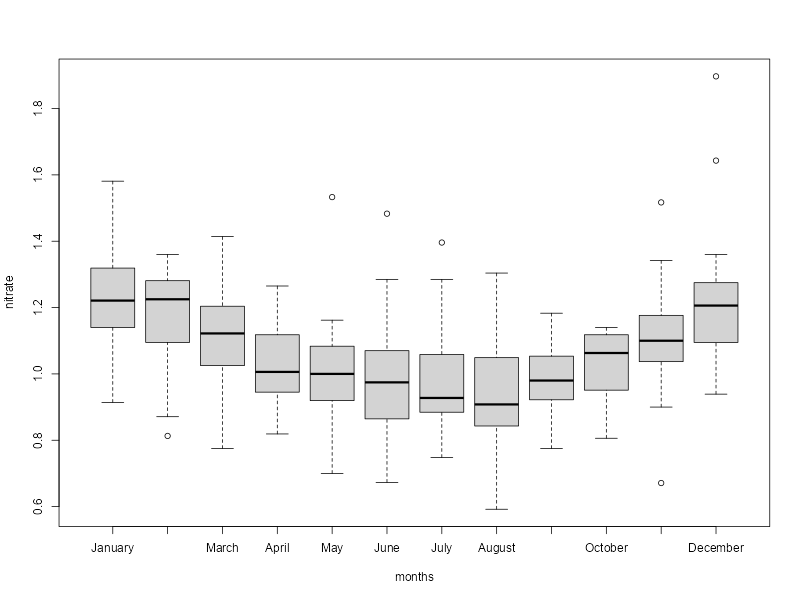

In [17]:
boxplot(nitrate ~ months, data = river_data)

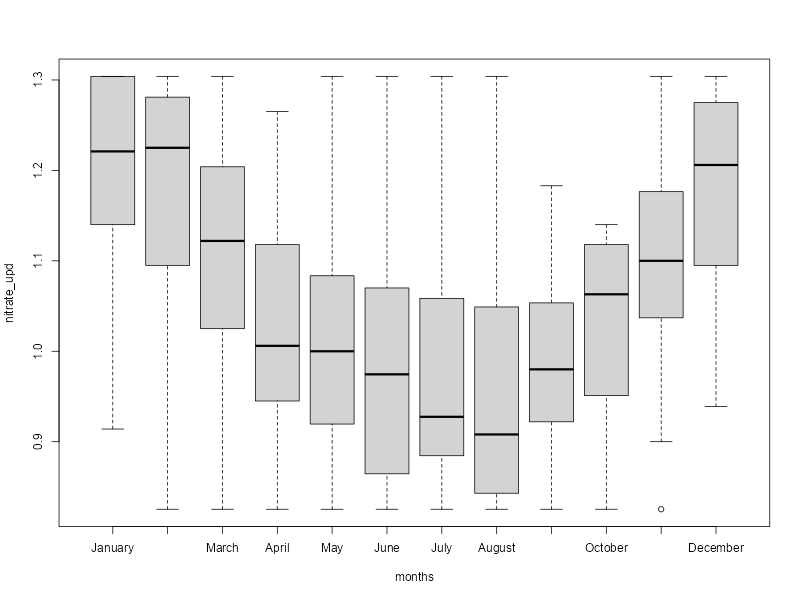

In [26]:
boxplot(nitrate_upd ~ months, data = river_data)

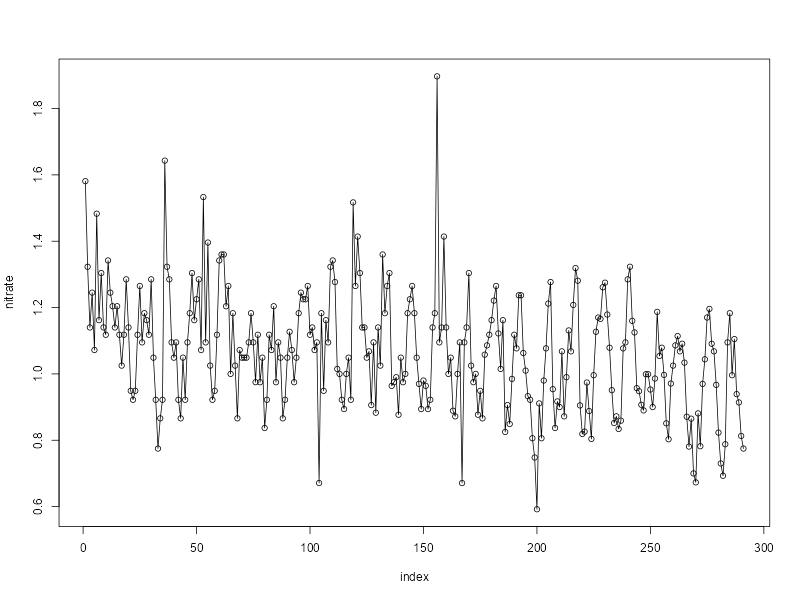

In [27]:
plot(nitrate ~ index, data = river_data, type = "o")

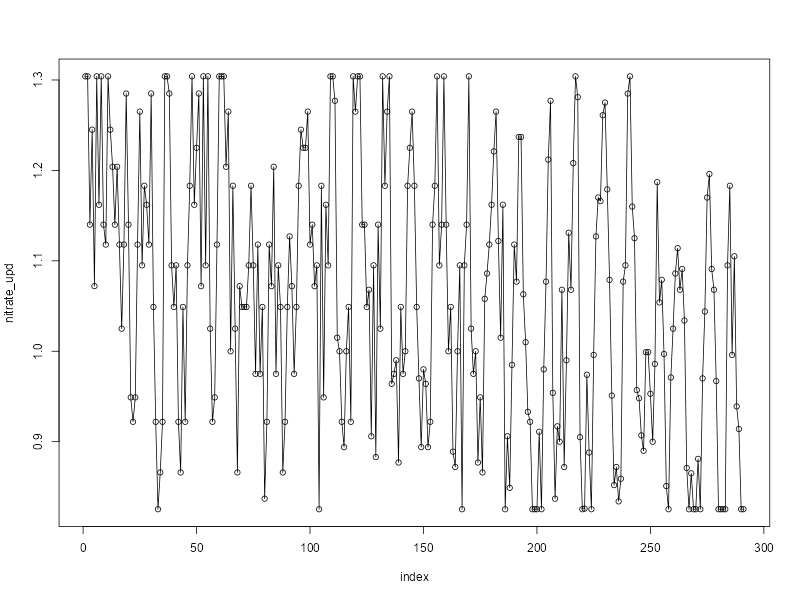

In [28]:
plot(nitrate_upd ~ index, data = river_data, type = "o")